In [1]:
#cuttle-environment-disable qugen-api
!pip install qiskit

In [2]:
#cuttle-environment-disable qugen-api
pip install qiskit[visualization]


Note: you may need to restart the kernel to use updated packages.


In [3]:
#cuttle-environment-disable qugen-api
pip install qiskit-machine-learning


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd # file read
import numpy as np # Linear Algebra
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # plotting data
%matplotlib inline
#Data Preprocessing fotwor Model
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit,BasicAer
from numpy import pi
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import NumPyDiscriminator, QGAN,PyTorchDiscriminator

seed = 71
np.random.seed = seed
algorithm_globals.random_seed = seed

In [6]:
def custom_ansatz():
    qreg_q = QuantumRegister(5, 'q')
    circuit = QuantumCircuit(qreg_q)
    
    theta0 = 472 * pi / 1000
    theta1 = 444 * pi / 1000
    theta2 = 416 * pi / 1000
    theta3 = 361 * pi / 1000
    theta4 = pi/3 
    circuit.ry(theta4, qreg_q[4])
    circuit.ry(472 * pi / 1000, qreg_q[0])
    circuit.ry(444 * pi / 1000, qreg_q[1])
    circuit.ry(416 * pi / 1000, qreg_q[2])
    circuit.ry(361 * pi / 1000, qreg_q[3])
    circuit.x(qreg_q[0])
    circuit.sx(qreg_q[0])
    circuit.sxdg(qreg_q[1])
    return circuit

In [7]:
def custom_ansatz1():
    qreg_q = QuantumRegister(5, 'q')
    #creg_c = ClassicalRegister(4, 'c')
    circuit = QuantumCircuit(qreg_q)
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
    circuit.ry(472 * pi / 1000, qreg_q[0])
    circuit.x(qreg_q[0])
    circuit.cry(444 * pi / 1000, qreg_q[0], qreg_q[1])
    circuit.cry(416 * pi / 1000, qreg_q[0], qreg_q[2])
    circuit.cry(361 * pi / 1000, qreg_q[0], qreg_q[3])
    circuit.cry(pi / 3, qreg_q[0], qreg_q[4])
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
    circuit.x(qreg_q[0])
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
    circuit.x(qreg_q[0])
    return circuit

In [8]:
def kurt_ansatz():
    qreg_q = QuantumRegister(5, 'q')
    #creg_c = ClassicalRegister(4, 'c')
    circuit = QuantumCircuit(qreg_q)
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
    circuit.ry(472 * pi / 1000, qreg_q[0])
    circuit.x(qreg_q[0])
    circuit.cry(444 * pi / 1000, qreg_q[0], qreg_q[1])
    circuit.cry(416 * pi / 1000, qreg_q[0], qreg_q[2])
    circuit.cry(361 * pi / 1000, qreg_q[0], qreg_q[3])
    circuit.cry(pi / 3, qreg_q[0], qreg_q[4])
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
    circuit.cx(qreg_q[3], qreg_q[0])
    circuit.cx(qreg_q[3], qreg_q[1])
    circuit.cx(qreg_q[3], qreg_q[2])
    return circuit

In [9]:
num_qubits = [5]

In [10]:
# This corresponds to applying Hadamard gates on all qubits
#init_dist = QuantumCircuit(sum(num_qubits))
#init_dist.h(init_dist.qubits)
ansatz=kurt_ansatz()
print(ansatz)

      ░ ┌────────────┐┌───┐                                          »
q_0: ─░─┤ Ry(1.4828) ├┤ X ├──────■─────────────■─────────────■───────»
      ░ └────────────┘└───┘┌─────┴──────┐      │             │       »
q_1: ─░────────────────────┤ Ry(1.3949) ├──────┼─────────────┼───────»
      ░                    └────────────┘┌─────┴──────┐      │       »
q_2: ─░──────────────────────────────────┤ Ry(1.3069) ├──────┼───────»
      ░                                  └────────────┘┌─────┴──────┐»
q_3: ─░────────────────────────────────────────────────┤ Ry(1.1341) ├»
      ░                                                └────────────┘»
q_4: ─░──────────────────────────────────────────────────────────────»
      ░                                                              »
«                 ░  ░ ┌───┐          
«q_0: ─────■──────░──░─┤ X ├──────────
«          │      ░  ░ └─┬─┘┌───┐     
«q_1: ─────┼──────░──░───┼──┤ X ├─────
«          │      ░  ░   │  └─┬─┘┌───┐
«q_2: ─────┼──────░──░──

In [11]:
# Set generator circuit by adding the initial distribution infront of the ansatz
#g_circuit = ansatz.compose(init_dist, front=True)
g_circuit = kurt_ansatz()
print(g_circuit)

      ░ ┌────────────┐┌───┐                                          »
q_0: ─░─┤ Ry(1.4828) ├┤ X ├──────■─────────────■─────────────■───────»
      ░ └────────────┘└───┘┌─────┴──────┐      │             │       »
q_1: ─░────────────────────┤ Ry(1.3949) ├──────┼─────────────┼───────»
      ░                    └────────────┘┌─────┴──────┐      │       »
q_2: ─░──────────────────────────────────┤ Ry(1.3069) ├──────┼───────»
      ░                                  └────────────┘┌─────┴──────┐»
q_3: ─░────────────────────────────────────────────────┤ Ry(1.1341) ├»
      ░                                                └────────────┘»
q_4: ─░──────────────────────────────────────────────────────────────»
      ░                                                              »
«                 ░  ░ ┌───┐          
«q_0: ─────■──────░──░─┤ X ├──────────
«          │      ░  ░ └─┬─┘┌───┐     
«q_1: ─────┼──────░──░───┼──┤ X ├─────
«          │      ░  ░   │  └─┬─┘┌───┐
«q_2: ─────┼──────░──░──

In [12]:
feature_df=pd.read_csv('c:/users/shyam/downloads/qml/dataFeatures.csv')

In [13]:
#cuttle-environment-disable qugen-api
scaler = StandardScaler ()
df1=feature_df[['FLAG','Kurtosis']]
df2=df1[df1.Kurtosis<=31]
#df3=df2[df2.FLAG ==1]
X = df2['Kurtosis'].values
y = df2['FLAG'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#cuttle-environment-disable qugen-api
scaler = StandardScaler ()
df1=feature_df[['Mean','FLAG']]
df2=df1[df1.Mean<31]
Y=df2.FLAG
X=df2.drop('FLAG',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
X_train

array([ 1.40680563e+00, -5.38975459e-02,  2.43760559e+00,  1.08528934e+00,
        9.95865077e-01,  1.48817205e+00,  1.16459289e+00,  1.02935644e+01,
        1.36697522e+00,  1.95293422e+01,  1.76058246e+00,  1.06083049e-01,
        4.65970498e+00, -5.61642245e-01,  1.48447538e+01,  1.25085673e+01,
        2.07410091e+00,  1.10376353e+00,  4.51594003e+00,  2.20218075e+00,
       -1.69474851e+00, -6.90251531e-01,  4.09679700e+00, -2.76612440e-01,
        5.02600002e-01,  1.68010109e+00,  7.53438357e+00, -8.10777015e-01,
        4.65970498e+00, -6.17404342e-01,  1.23993470e+01,  1.63985654e+00,
        2.38184635e+00, -5.61642245e-01,  1.64717479e+00,  4.11319122e+00,
        1.64717479e+00,  2.38184635e+00,  1.87018826e+00,  1.02935644e+01,
        7.80003744e-02,  1.16251007e+00,  3.32104767e-01,  2.03664419e-01,
        7.09724827e-01,  1.64717479e+00,  3.18810108e+00,  3.19249280e-01,
        5.86790657e+00,  7.94197347e+00,  6.47638235e+00,  2.10462210e+00,
        6.25357408e+00, -

In [15]:
y_train

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,

In [16]:
X_train[:100]

array([ 1.40680563, -0.05389755,  2.43760559,  1.08528934,  0.99586508,
        1.48817205,  1.16459289, 10.29356438,  1.36697522, 19.52934222,
        1.76058246,  0.10608305,  4.65970498, -0.56164225, 14.84475383,
       12.50856734,  2.07410091,  1.10376353,  4.51594003,  2.20218075,
       -1.69474851, -0.69025153,  4.096797  , -0.27661244,  0.5026    ,
        1.68010109,  7.53438357, -0.81077701,  4.65970498, -0.61740434,
       12.39934702,  1.63985654,  2.38184635, -0.56164225,  1.64717479,
        4.11319122,  1.64717479,  2.38184635,  1.87018826, 10.29356438,
        0.07800037,  1.16251007,  0.33210477,  0.20366442,  0.70972483,
        1.64717479,  3.18810108,  0.31924928,  5.86790657,  7.94197347,
        6.47638235,  2.1046221 ,  6.25357408, -1.30478569,  4.65970498,
        2.38184635,  0.38174045,  0.47733243, 20.19559465,  1.80105689,
        6.70746902,  2.92771394, 30.17901964,  1.08563867,  1.02017688,
        8.07862203,  0.83727052,  0.60429307, 12.21549323,  7.70

In [17]:
num_epochs = 10
# Batch size
batch_size = 10
num_qubits=[5]
bounds = np.array([0, 5])

# Initialize qGAN
qgan = QGAN(X_train[:100],bounds,num_qubits, batch_size, num_epochs, snapshot_dir=None)
qgan.seed = 1


In [18]:
#cuttle-environment-disable qugen-api
len(X_train[0])

TypeError: object of type 'numpy.float64' has no len()

In [19]:
# Set quantum instance to run the quantum generator
quantum_instance = QuantumInstance(
    backend=BasicAer.get_backend("statevector_simulator"), seed_transpiler=seed, seed_simulator=seed
)

# Set generator's initial parameters - in order to reduce the training time and hence the
# total running time for this notebook
init_params = [3.0, 1.0, 0.6, 1.6,5.0]
# Set quantum generator
qgan.set_generator(generator_circuit=g_circuit, generator_init_params=init_params)
# The parameters have an order issue that following is a temp. workaround
qgan._generator._free_parameters = sorted(g_circuit.parameters, key=lambda p: p.name)
# Set classical discriminator neural network
discriminator = NumPyDiscriminator(len(num_qubits))
#discriminator = PyTorchDiscriminator(len(num_qubits))
qgan.set_discriminator(discriminator)


In [20]:
# Run qGAN
result = qgan.run(quantum_instance)

In [21]:
print("Training results:")
for key, value in result.items():
    print(f"  {key} : {value}")

Training results:
  params_d : [ 0.04911239  0.59810702 -0.46963301 ... -0.15362179 -0.21386047
 -0.09185645]
  params_g : [3.  1.  0.6 1.6 5. ]
  loss_d : 0.6455
  loss_g : [0.5943]
  rel_entr : 3.0969


In [22]:
## result fopr ansatz1
print("Training results:")
for key, value in result.items():
    print(f"  {key} : {value}")

Training results:
  params_d : [ 0.04911239  0.59810702 -0.46963301 ... -0.15362179 -0.21386047
 -0.09185645]
  params_g : [3.  1.  0.6 1.6 5. ]
  loss_d : 0.6455
  loss_g : [0.5943]
  rel_entr : 3.0969


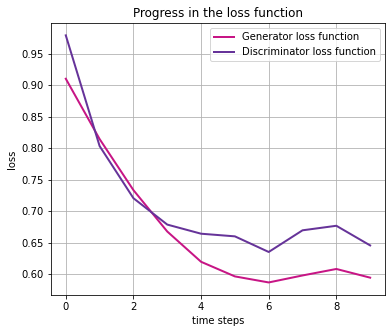

In [23]:
# Plot progress w.r.t the generator's and the discriminator's loss function ansatz1
t_steps = np.arange(num_epochs)
plt.figure(figsize=(6, 5))
plt.title("Progress in the loss function")
plt.plot(
    t_steps, qgan.g_loss, label="Generator loss function", color="mediumvioletred", linewidth=2
)
plt.plot(
    t_steps, qgan.d_loss, label="Discriminator loss function", color="rebeccapurple", linewidth=2
)
plt.grid()
plt.legend(loc="best")
plt.xlabel("time steps")
plt.ylabel("loss")
plt.show()


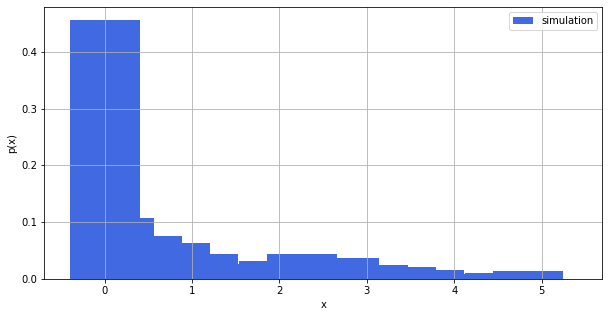

In [24]:
plt.figure(figsize=(10, 5))
samples_g, prob_g = qgan.generator.get_output(qgan.quantum_instance, shots=1000)
samples_g = np.array(samples_g)
samples_g = samples_g.flatten()
num_bins = len(prob_g)
plt.bar(samples_g,prob_g, color="royalblue", width=0.8, label="simulation")
#plt.plot(
#    np.cumsum(log_normal), "-o", label="log-normal", color="deepskyblue", linewidth=4, markersize=12
#)
#plt.xticks(np.arange(min(samples_g), max(samples_g) + 1, 1.0))
plt.grid()
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend(loc="best")
plt.show()


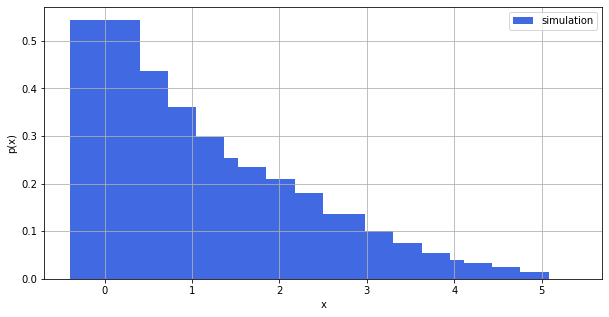

In [25]:
plt.figure(figsize=(10, 5))
#plt.title("CDF (Cumulative Distribution Function)")
samples_g, prob_g = qgan.generator.get_output(qgan.quantum_instance, shots=1000)
samples_g = np.array(samples_g)
samples_g = samples_g.flatten()
num_bins = len(prob_g)
plt.bar(samples_g,1- np.cumsum(prob_g), color="royalblue", width=0.8, label="simulation")
#plt.plot(
#    np.cumsum(log_normal), "-o", label="log-normal", color="deepskyblue", linewidth=4, markersize=12
#)
#plt.xticks(np.arange(min(samples_g), max(samples_g) + 1, 1.0))
plt.grid()
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend(loc="best")
plt.show()

In [26]:
#result fotr Pytorch discriminator
print("Training results:")
for key, value in result.items():
    print(f"  {key} : {value}")

Training results:
  params_d : [ 0.04911239  0.59810702 -0.46963301 ... -0.15362179 -0.21386047
 -0.09185645]
  params_g : [3.  1.  0.6 1.6 5. ]
  loss_d : 0.6455
  loss_g : [0.5943]
  rel_entr : 3.0969


In [27]:
qgan.g_loss

[array([0.9102]),
 array([0.8144]),
 array([0.7333]),
 array([0.6676]),
 array([0.6195]),
 array([0.5963]),
 array([0.5867]),
 array([0.5978]),
 array([0.6081]),
 array([0.5943])]

In [28]:
qgan.d_loss

[0.9791,
 0.8033,
 0.7205,
 0.6786,
 0.6641,
 0.6599,
 0.6351,
 0.6695,
 0.6767,
 0.6455]

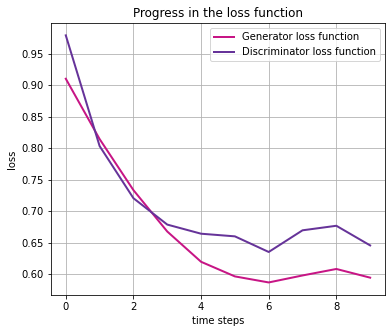

In [29]:
# Plot progress w.r.t the generator's and the discriminator's loss function
t_steps = np.arange(num_epochs)
plt.figure(figsize=(6, 5))
plt.title("Progress in the loss function")
plt.plot(
    t_steps, qgan.g_loss, label="Generator loss function", color="mediumvioletred", linewidth=2
)
plt.plot(
    t_steps, qgan.d_loss, label="Discriminator loss function", color="rebeccapurple", linewidth=2
)
plt.grid()
plt.legend(loc="best")
plt.xlabel("time steps")
plt.ylabel("loss")
plt.show()


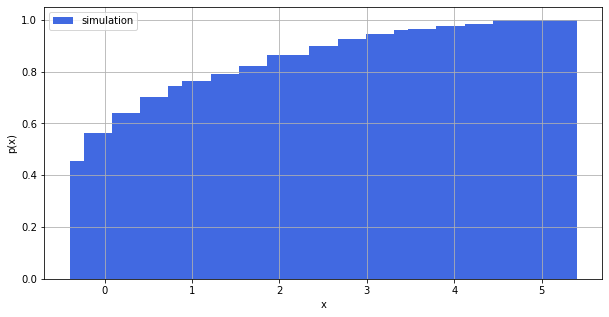

In [30]:
# Plot the CDF of the resulting distribution against the target distribution, i.e. log-normal
#log_normal = np.random.lognormal(mean=1, sigma=1, size=100000)
#log_normal = np.round(log_normal)
#log_normal = log_normal[log_normal <= bounds[1]]
#temp = []
#for i in range(int(bounds[1] + 1)):
#    temp += [np.sum(log_normal == i)]
#log_normal = np.array(temp / sum(temp))

plt.figure(figsize=(10, 5))
#plt.title("CDF (Cumulative Distribution Function)")
samples_g, prob_g = qgan.generator.get_output(qgan.quantum_instance, shots=1000)
samples_g = np.array(samples_g)
samples_g = samples_g.flatten()
num_bins = len(prob_g)
plt.bar(samples_g, np.cumsum(prob_g), color="royalblue", width=0.8, label="simulation")
#plt.plot(
#    np.cumsum(log_normal), "-o", label="log-normal", color="deepskyblue", linewidth=4, markersize=12
#)
plt.xticks(np.arange(min(samples_g), max(samples_g) + 1, 1.0))
plt.grid()
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend(loc="best")
plt.show()


In [31]:
samples_g, prob_g = qgan.generator.get_output(qgan.quantum_instance, shots=1000)
print(samples_g, prob_g)

[[0.0], [0.16129032258064516], [0.3225806451612903], [0.4838709677419355], [0.6451612903225806], [0.8064516129032258], [0.967741935483871], [1.129032258064516], [1.2903225806451613], [1.4516129032258065], [1.6129032258064515], [1.7741935483870968], [1.935483870967742], [2.096774193548387], [2.258064516129032], [2.4193548387096775], [2.5806451612903225], [2.7419354838709675], [2.903225806451613], [3.064516129032258], [3.225806451612903], [3.3870967741935485], [3.5483870967741935], [3.7096774193548385], [3.870967741935484], [4.032258064516129], [4.193548387096774], [4.354838709677419], [4.516129032258064], [4.67741935483871], [4.838709677419355], [5.0]] [0.4560744017246279, 0.10749854842976996, 0.0, 0.07547411344040335, 0.0, 0.06302018512000189, 0.0, 0.044246110019705534, 0.017943831964048237, 0.0, 0.02555758261309075, 0.0, 0.030608223154690004, 0.0, 0.04359560396481903, 0.0, 0.0, 0.035832849476589976, 0.0, 0.02515803781346777, 0.0, 0.02100672837333396, 0.0, 0.014748703339901841, 0.00598

In [32]:

#cuttle-environment-disable qugen-api
df3['Kurtosis'].hist()

NameError: name 'df3' is not defined

In [33]:
df2.head()

,FLAG,Kurtosis
0,1,0.477332
1,1,1.164593
2,1,10.293564
3,1,-0.561642
4,1,4.318327


In [34]:
# Plot the CDF of the resulting distribution against the target distribution, i.e. log-normal
log_normal = np.random.lognormal(mean=1, sigma=1, size=100000)
log_normal = np.round(log_normal)
log_normal = log_normal[log_normal <= bounds[1]]
temp = []
for i in range(int(bounds[1] + 1)):
    temp += [np.sum(log_normal == i)]
log_normal = np.array(temp / sum(temp))
print(log_normal)
print(bounds[1])

[0.05897156 0.301498   0.24995718 0.17728357 0.12359521 0.08869448]
5


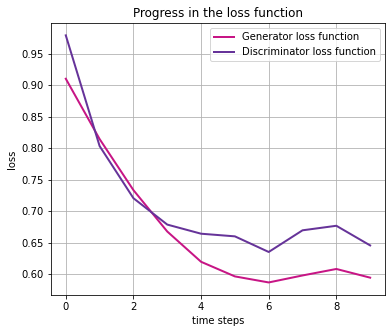

In [35]:
# Plot progress w.r.t the generator's and the discriminator's loss function
t_steps = np.arange(num_epochs)
plt.figure(figsize=(6, 5))
plt.title("Progress in the loss function")
plt.plot(
    t_steps, qgan.g_loss, label="Generator loss function", color="mediumvioletred", linewidth=2
)
plt.plot(
    t_steps, qgan.d_loss, label="Discriminator loss function", color="rebeccapurple", linewidth=2
)
plt.grid()
plt.legend(loc="best")
plt.xlabel("time steps")
plt.ylabel("loss")
plt.show()


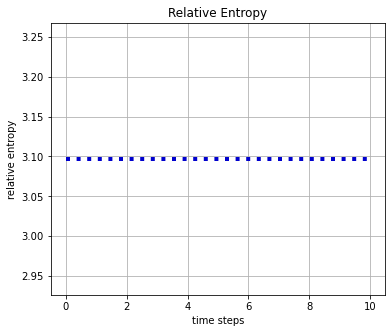

In [36]:
# Plot progress w.r.t relative entropy
plt.figure(figsize=(6, 5))
plt.title("Relative Entropy")
plt.plot(
    np.linspace(0, num_epochs, len(qgan.rel_entr)), qgan.rel_entr, color="mediumblue", lw=4, ls=":"
)
plt.grid()
plt.xlabel("time steps")
plt.ylabel("relative entropy")
plt.show()

In [37]:
feature_df=pd.read_csv('C:/Users/shyam/Downloads/qml/dataFeatures.csv')

In [39]:
feature_df

,CONS_NO,FLAG,Mean,Median,Standard deviation,Variance,Kurtosis,Skew,5%,10%,20%,25%,30%,40%,60%,75%,80%,Error in mean
0,26DA200D4A887F6AA5B94F5682001428,1,3.818836,3.71,1.127881,1.272115,0.477332,0.649697,2.2700,2.490,2.87,2.990,3.130,3.400,4.010,4.4800,4.680,0.001089
1,CD8A4B3D5656402D086D865363A34C4B,1,3.321740,3.36,1.268735,1.609688,1.164593,0.613340,1.5700,1.788,2.11,2.250,2.390,2.792,3.770,4.2400,4.410,0.001225
2,CF9D07950731DB8A0B8A7EECF36A23AE,1,1.435686,1.31,0.834369,0.696172,10.293564,2.524796,0.6800,0.730,0.82,0.860,0.900,1.106,1.360,1.6300,1.712,0.000805
3,3E81EC817E9218F25816849A3EDF5FF2,1,3.262820,2.03,2.372969,5.630983,-0.561642,0.723519,0.7855,0.960,1.16,1.250,1.370,1.604,3.964,5.2425,5.608,0.002291
4,A403518D4F4BB4C5ADAF2AB493F428EE,1,2.479465,2.03,1.800767,3.242762,4.318327,1.769351,0.7600,0.878,1.03,1.100,1.170,1.480,2.460,3.2700,3.670,0.001738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,DataImp_Con128,1,3.789611,3.77,1.084756,1.176696,0.237331,0.410936,2.1535,2.387,2.77,2.910,3.081,3.470,4.070,4.5500,4.736,0.001047
517,DataImp_Con129,1,1.587003,2.11,1.140646,1.301074,-1.727199,-0.115961,0.1250,0.190,0.30,0.350,0.420,0.570,2.350,2.6100,2.680,0.001101
518,DataImp_Con130,1,2.665934,1.95,1.740794,3.030364,2.381846,1.368796,0.8410,1.090,1.27,1.360,1.450,1.640,2.684,3.7100,4.036,0.001680
519,DataImp_Con131,1,2.411979,1.55,1.849106,3.419192,-0.447903,0.842094,0.5700,0.670,0.81,0.870,0.950,1.160,2.350,4.0050,4.370,0.001785


In [40]:
for i, column in enumerate(feature_df.drop('CONS_NO', axis=1).columns):
    print(i)
    print(column)

0
FLAG
1
Mean
2
Median
3
Standard deviation
4
Variance
5
Kurtosis
6
Skew
7
5%
8
10%
9
20%
10
25%
11
30%
12
40%
13
60%
14
75%
15
80%
16
Error in mean


C:\Users\shyam\AppData\Local\Temp\ipykernel_14688\1623428335.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


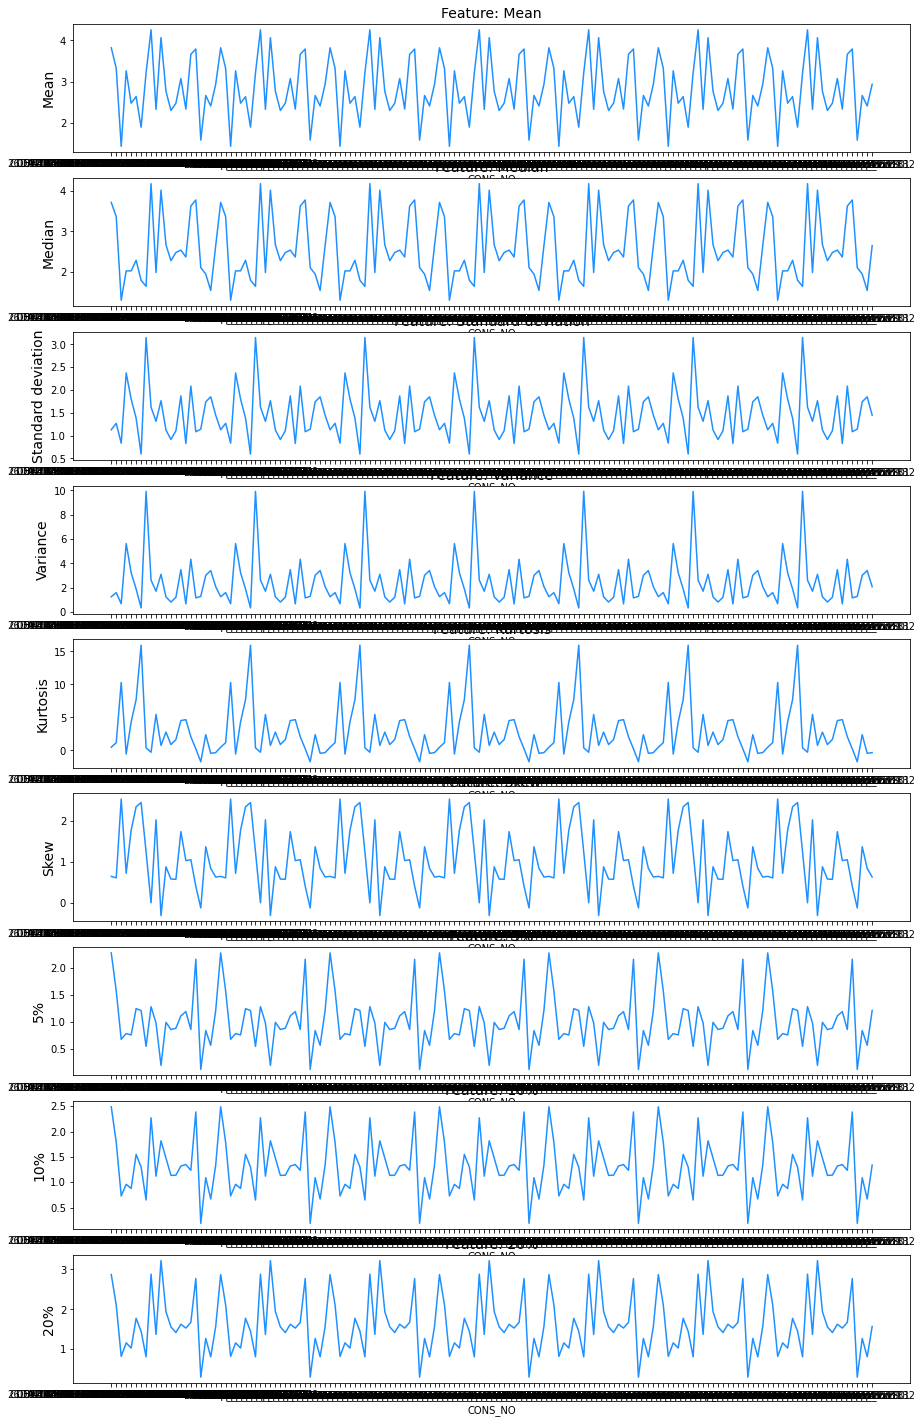

In [41]:
# To compelte the data, as naive method, we will use ffill
feature_df_1 = feature_df.query("FLAG == 1")
feature_df_0 = feature_df.query("FLAG == 0")
f, ax = plt.subplots( 9, figsize=(15, 25))
#flag =1
for i, column in enumerate(feature_df_1.drop(['CONS_NO','FLAG'], axis=1).columns):
    if i<=8:
        sns.lineplot(x=feature_df_1['CONS_NO'], y=feature_df_1[column], ax=ax[i], color='dodgerblue')
        ax[i].set_title('Feature: {}'.format(column), fontsize=14)
        ax[i].set_ylabel(ylabel=column, fontsize=14)
f.show()

C:\Users\shyam\AppData\Local\Temp\ipykernel_14688\449207060.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


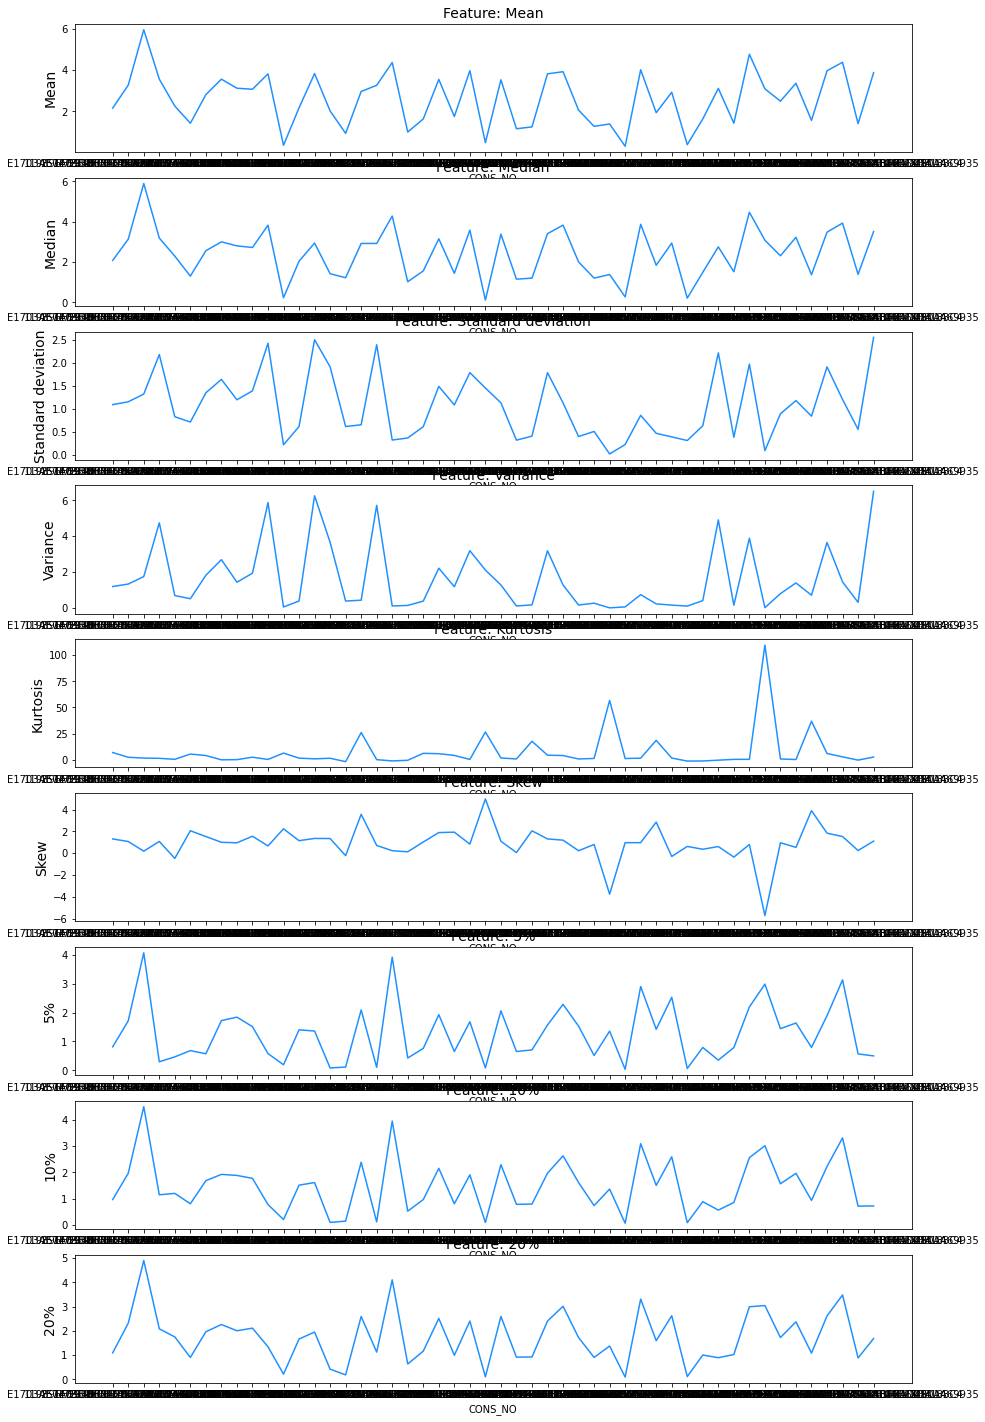

In [42]:
#flag =0
f, ax = plt.subplots( 9, figsize=(15, 25))
feature_df_0 =feature_df_0.head(50)
for i, column in enumerate(feature_df_0.drop(['CONS_NO','FLAG'], axis=1).columns):
    if i<=8:
        sns.lineplot(x=feature_df_0['CONS_NO'], y=feature_df_0[column], ax=ax[i], color='dodgerblue')
        ax[i].set_title('Feature: {}'.format(column), fontsize=14)
        ax[i].set_ylabel(ylabel=column, fontsize=14)
f.show()

array([[<AxesSubplot:title={'center':'Mean'}>]], dtype=object)

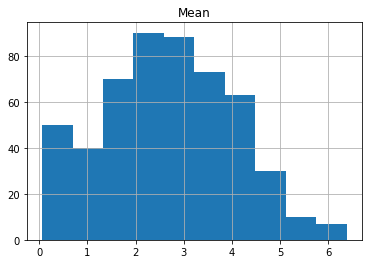

In [43]:
feature_df.hist('Mean')

array([[<AxesSubplot:title={'center':'Median'}>]], dtype=object)

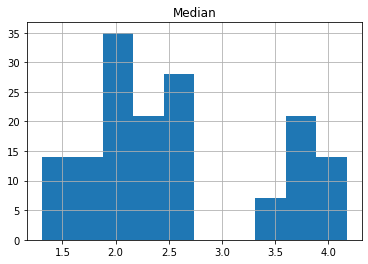

In [44]:
feature_df_1.hist('Median')

array([[<AxesSubplot:title={'center':'Kurtosis'}>]], dtype=object)

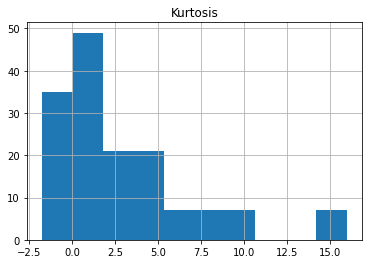

In [45]:
feature_df_1.hist('Kurtosis')

array([[<AxesSubplot:title={'center':'Kurtosis'}>]], dtype=object)

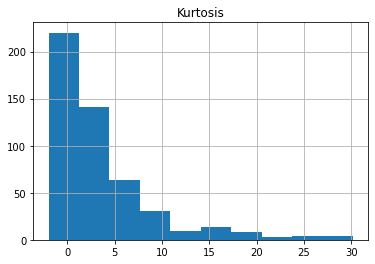

In [46]:
df2.hist('Kurtosis')

array([[<AxesSubplot:title={'center':'Kurtosis'}>]], dtype=object)

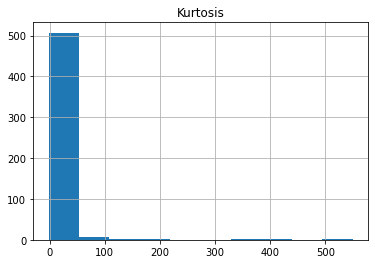

In [47]:
feature_df.hist('Kurtosis')

In [48]:
scaler = StandardScaler ()
df1=feature_df[['FLAG','Kurtosis']]
X = df1['Kurtosis'].values
y = df1['FLAG'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
X_train

array([ 2.61936412e+00,  3.81175365e-01,  1.62519173e+00,  2.14073098e+01,
        2.37330939e-01,  8.84531743e-01,  7.70304353e+00,  1.64717479e+00,
        1.03230938e+02,  1.10376353e+00,  5.45075635e+00,  1.09502313e+02,
       -2.84075541e-01, -4.42583803e-01,  8.38804304e+00,  1.91538062e+01,
       -3.82650737e-01, -4.46866086e-01,  8.40701419e-01,  4.24274579e+00,
        8.10754283e+01,  1.46418213e+00,  7.94197347e+00, -5.61642245e-01,
        3.72163709e-01,  1.53060231e+00,  6.21022492e+00,  3.19413095e+00,
        4.51594003e+00, -1.72719930e+00,  4.65970498e+00,  6.94697343e-01,
        2.40712310e+00,  2.60937587e+01,  2.66112057e+01, -1.72719930e+00,
        8.84531743e-01,  1.44757190e+01,  1.20458386e+00,  2.38184635e+00,
        4.65970498e+00,  2.01955947e+01,  9.95865077e-01,  7.01095131e+00,
        7.45102878e-01, -3.64968739e-01, -2.84075541e-01,  2.07410091e+00,
       -1.72719930e+00,  2.26542799e+01,  2.90296383e+00,  6.09978447e+00,
        1.71775890e+01, -

In [50]:
y_train

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,

NameError: name 'ax1' is not defined

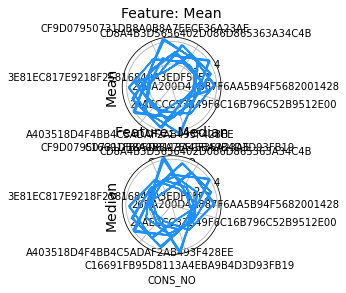

In [51]:
#cuttle-environment-disable qugen-api
fig, ax = plt.subplots(2, subplot_kw=dict(projection='polar'))
for i, column in enumerate(feature_df_1.drop(['CONS_NO','FLAG'], axis=1).columns):
    if i<=1:
        sns.lineplot(x=feature_df_1['CONS_NO'], y=feature_df_1[column], ax=ax[i], color='dodgerblue')
        ax[i].set_title('Feature: {}'.format(column), fontsize=14)
        ax[i].set_ylabel(ylabel=column, fontsize=14)
ax1.plot(x, y)
ax2.plot(x, y ** 2)

plt.show()